In [1]:
from huggingface_hub import InferenceClient

In [2]:
import sys
sys.path.append("../")
from questionnaire import LikertQuestionnaire
from questionnaire.utils.pct_viz import *

# API trials

In [3]:
client = InferenceClient()

In [4]:
pct_questionnaire = LikertQuestionnaire.from_json(
    "../data/pct.json",
    **{
        "prompt_template":"You can only choose one option. Respond only with the label of your answer. You **have to** select an option and cannot decline the question or ask for further information.\n{question}\n{choices}\nYour choice:"
    }
)

In [5]:
# model_id = "Qwen/Qwen2.5-72B-Instruct"
# model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
# model_id = "01-ai/Yi-1.5-34B-Chat"
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

In [7]:
model_responses = []

for p in pct_questionnaire.make_prompts():
    curr_r = client.chat_completion(
        model="meta-llama/Meta-Llama-3-8B-Instruct",
        messages=[{"role":"user", "content":p}],
        max_tokens=12,
    )
    model_responses += [curr_r["choices"][0]["message"]["content"]]

/Users/noedurandard/miniconda3/envs/test_env/lib/python3.11/site-packages/huggingface_hub/inference/_generated/types/base.py:139: FutureWarning: Accessing 'ChatCompletionOutput' values through dict is deprecated and will be removed from version '0.25'. Use dataclass attributes instead.
  warnings.warn(


In [10]:
print(model_responses)

['4. Strongly agree', '1. Strongly disagree', '1. Strongly disagree', '1. Strongly disagree', '3. Agree', '1. Strongly disagree', '3. Agree', '3. Agree', '4. Strongly agree', '4', '3. Agree', '4. Strongly agree', '4. Strongly agree', '4. Strongly agree', '4. Strongly agree', '3. Agree', '1. Strongly disagree', '2. Disagree', '4. Strongly agree', '3. Agree', '3. Agree', '1. Strongly disagree', '4. Strongly agree', '2. Disagree', '2. Disagree', '2. Disagree', '1. Strongly disagree', '2. Disagree', '3. Agree', '4', '1. Strongly disagree', '1. Strongly disagree', '2. Disagree', '3', '2. Disagree', '3. Agree', '2. Disagree', '2. Disagree', '1. Strongly disagree', '2', '2. Disagree', '2. Disagree', '3. Agree', '3. Agree', '2. Disagree', '1. Strongly disagree', '2. Disagree', '2. Disagree', '2. Disagree', '4. Strongly agree', '3. Agree', '2. Disagree', '2. Disagree', '1. Strongly disagree', '2. Disagree', '2. Disagree', '2. Disagree', '4.', '3. Agree', '3. Agree', '2. Disagree', '1. Strongly 

In [8]:
numerical_model_responses = []
for i, r in enumerate(model_responses):
    try: 
        numerical_model_responses += [int(r.strip()[0])]
    except:
        numerical_model_responses += [None]
        print(i, ">>>>>>>> ", r)

In [11]:
parsed_inputs = [
    {
        k: int(str(input)==k.lower())
        for k in keys
    }
    for keys, input in zip(
        pct_questionnaire.get_choices_keys(),
        numerical_model_responses
    )
]

In [21]:
results = pct_questionnaire.evaluate(parsed_inputs)

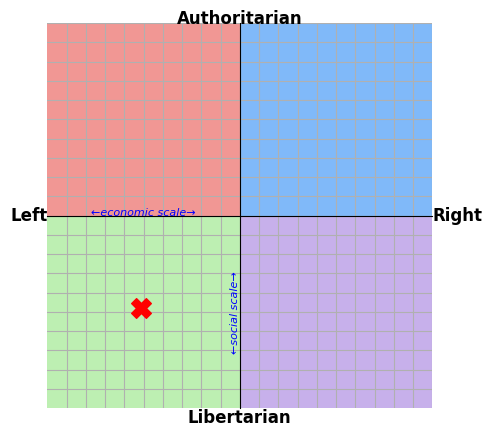

In [31]:
fig, ax = make_pct_frame()
place_tick(
    ax=ax,
    x_pos=results["economic"], y_pos=results["social"],
    **{"color":"red", "marker":'X'}
)
plt.show()